In [1]:
# Preparation
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib
# matplotlib.use('Agg')
matplotlib.rcParams['savefig.dpi'] = 300
import matplotlib.pyplot as plt


def get_input_grid(batch_size=100, grid_max = 3):
    a, b = -grid_max, grid_max
    dim = 2
    single_grid = np.linspace(a, b, num=math.floor(math.sqrt(batch_size)))
    x = np.array(np.meshgrid(*((single_grid, ) * dim))).T.reshape(-1, dim)
    return x


def save_vector_field(func, x: np.ndarray, out_file_path: Path=None, color='black', figure_max = 3.2):
    """
    See https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.quiver.html for how to draw quivers.
    """
    pred, x_cpu = func(x), x
    fig, ax = plt.subplots()
    ax.quiver(
        x_cpu[:, 0],
        x_cpu[:, 1],
        pred[:, 0] - x_cpu[:, 0],
        pred[:, 1] - x_cpu[:, 1],
        angles='xy',  # This way, arrows point from (x,y) to (x+u, y+v).
        units='xy',
        scale_units='xy',
        scale=1.0,
        alpha=0.5,
        color=color
    )
    ax.axis([-figure_max, figure_max, -figure_max, figure_max])
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()
    if out_file_path is not None:
        fig.savefig(str(out_file_path), dpi=300, format='pdf')
    plt.close(fig)

\|A - I\|_op = 0.8090169943749475


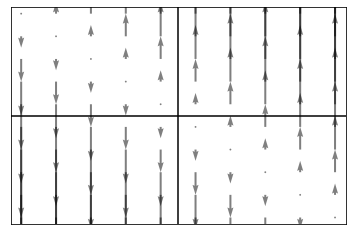

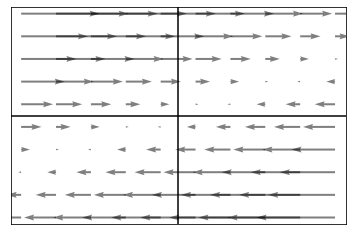

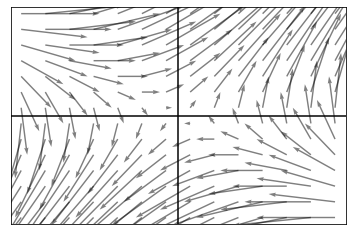

[[1.  0.5]
 [0.5 1.5]]
[[2. 1.]
 [1. 3.]]
[[1.5 2. ]]


In [2]:
import math
from numpy.linalg import norm

out_dir = Path('out')
out_dir.mkdir(exist_ok=True)

x = get_input_grid()
x_dense = get_input_grid(200)

a, b = 2, 1
c, d = 1, 3
scale = .5
a, b, c, d = a * scale, b * scale, c * scale, d * scale

print(f'\|A - I\|_op = {norm(np.array([[a - 1, b], [c, d - 1]]), ord=2)}')

func_1 = lambda x: x @ np.array([[1, 0],
                                 [c, d]]).T
func_2 = lambda x: x @ np.array([[a - b * c / d, b / d],
                                 [0, 1]]).T
func = lambda x: func_2(func_1(x))

# Just show the plots
save_vector_field(func_1, x)
save_vector_field(func_2, x)
save_vector_field(func, x_dense)

print(func(np.array([[1, 0], [0, 1]])))
print(func(np.array([[2, 0], [0, 2]])))
print(func(np.array([[1, 1]])))

In [3]:
# Output to files
# save_vector_field(func_1, x, out_dir / f'func_1.pdf')
# save_vector_field(func_2, x, out_dir / f'func_2.pdf')
# save_vector_field(func, x_dense, out_dir / f'func.pdf')